# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [28]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

# Libraries for data preparation and model building
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler, LabelEncoder
import numpy as np
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 12

C:\Users\User\AppData\Local\Temp\ipykernel_17944\485188974.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#loading the datasets
#

df = pd.read_csv('df_train.csv')
test = pd.read_csv('df_test.csv')
ss = pd.read_csv('sample_submission_load_shortfall (1).csv')

## - below I am appending test to train to make the preprocessing of information easier and popping the target "load_shortfall_3h"

In [3]:
target = df.pop('load_shortfall_3h')

#append is depreceated and we should start using .concat instead
kaiju = df.append(test)
kaiju

C:\Users\User\AppData\Local\Temp\ipykernel_17944\2529168609.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kaiju = df.append(test)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# look at data statistics
kaiju.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437


In [5]:
kaiju.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,...,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,...,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,...,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,...,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,...,296.816667,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917
max,11682.000000,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,...,314.076667,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333


In [6]:
kaiju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [7]:
# plot relevant feature interactions


C:\Users\User\AppData\Local\Temp\ipykernel_17944\2649186008.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


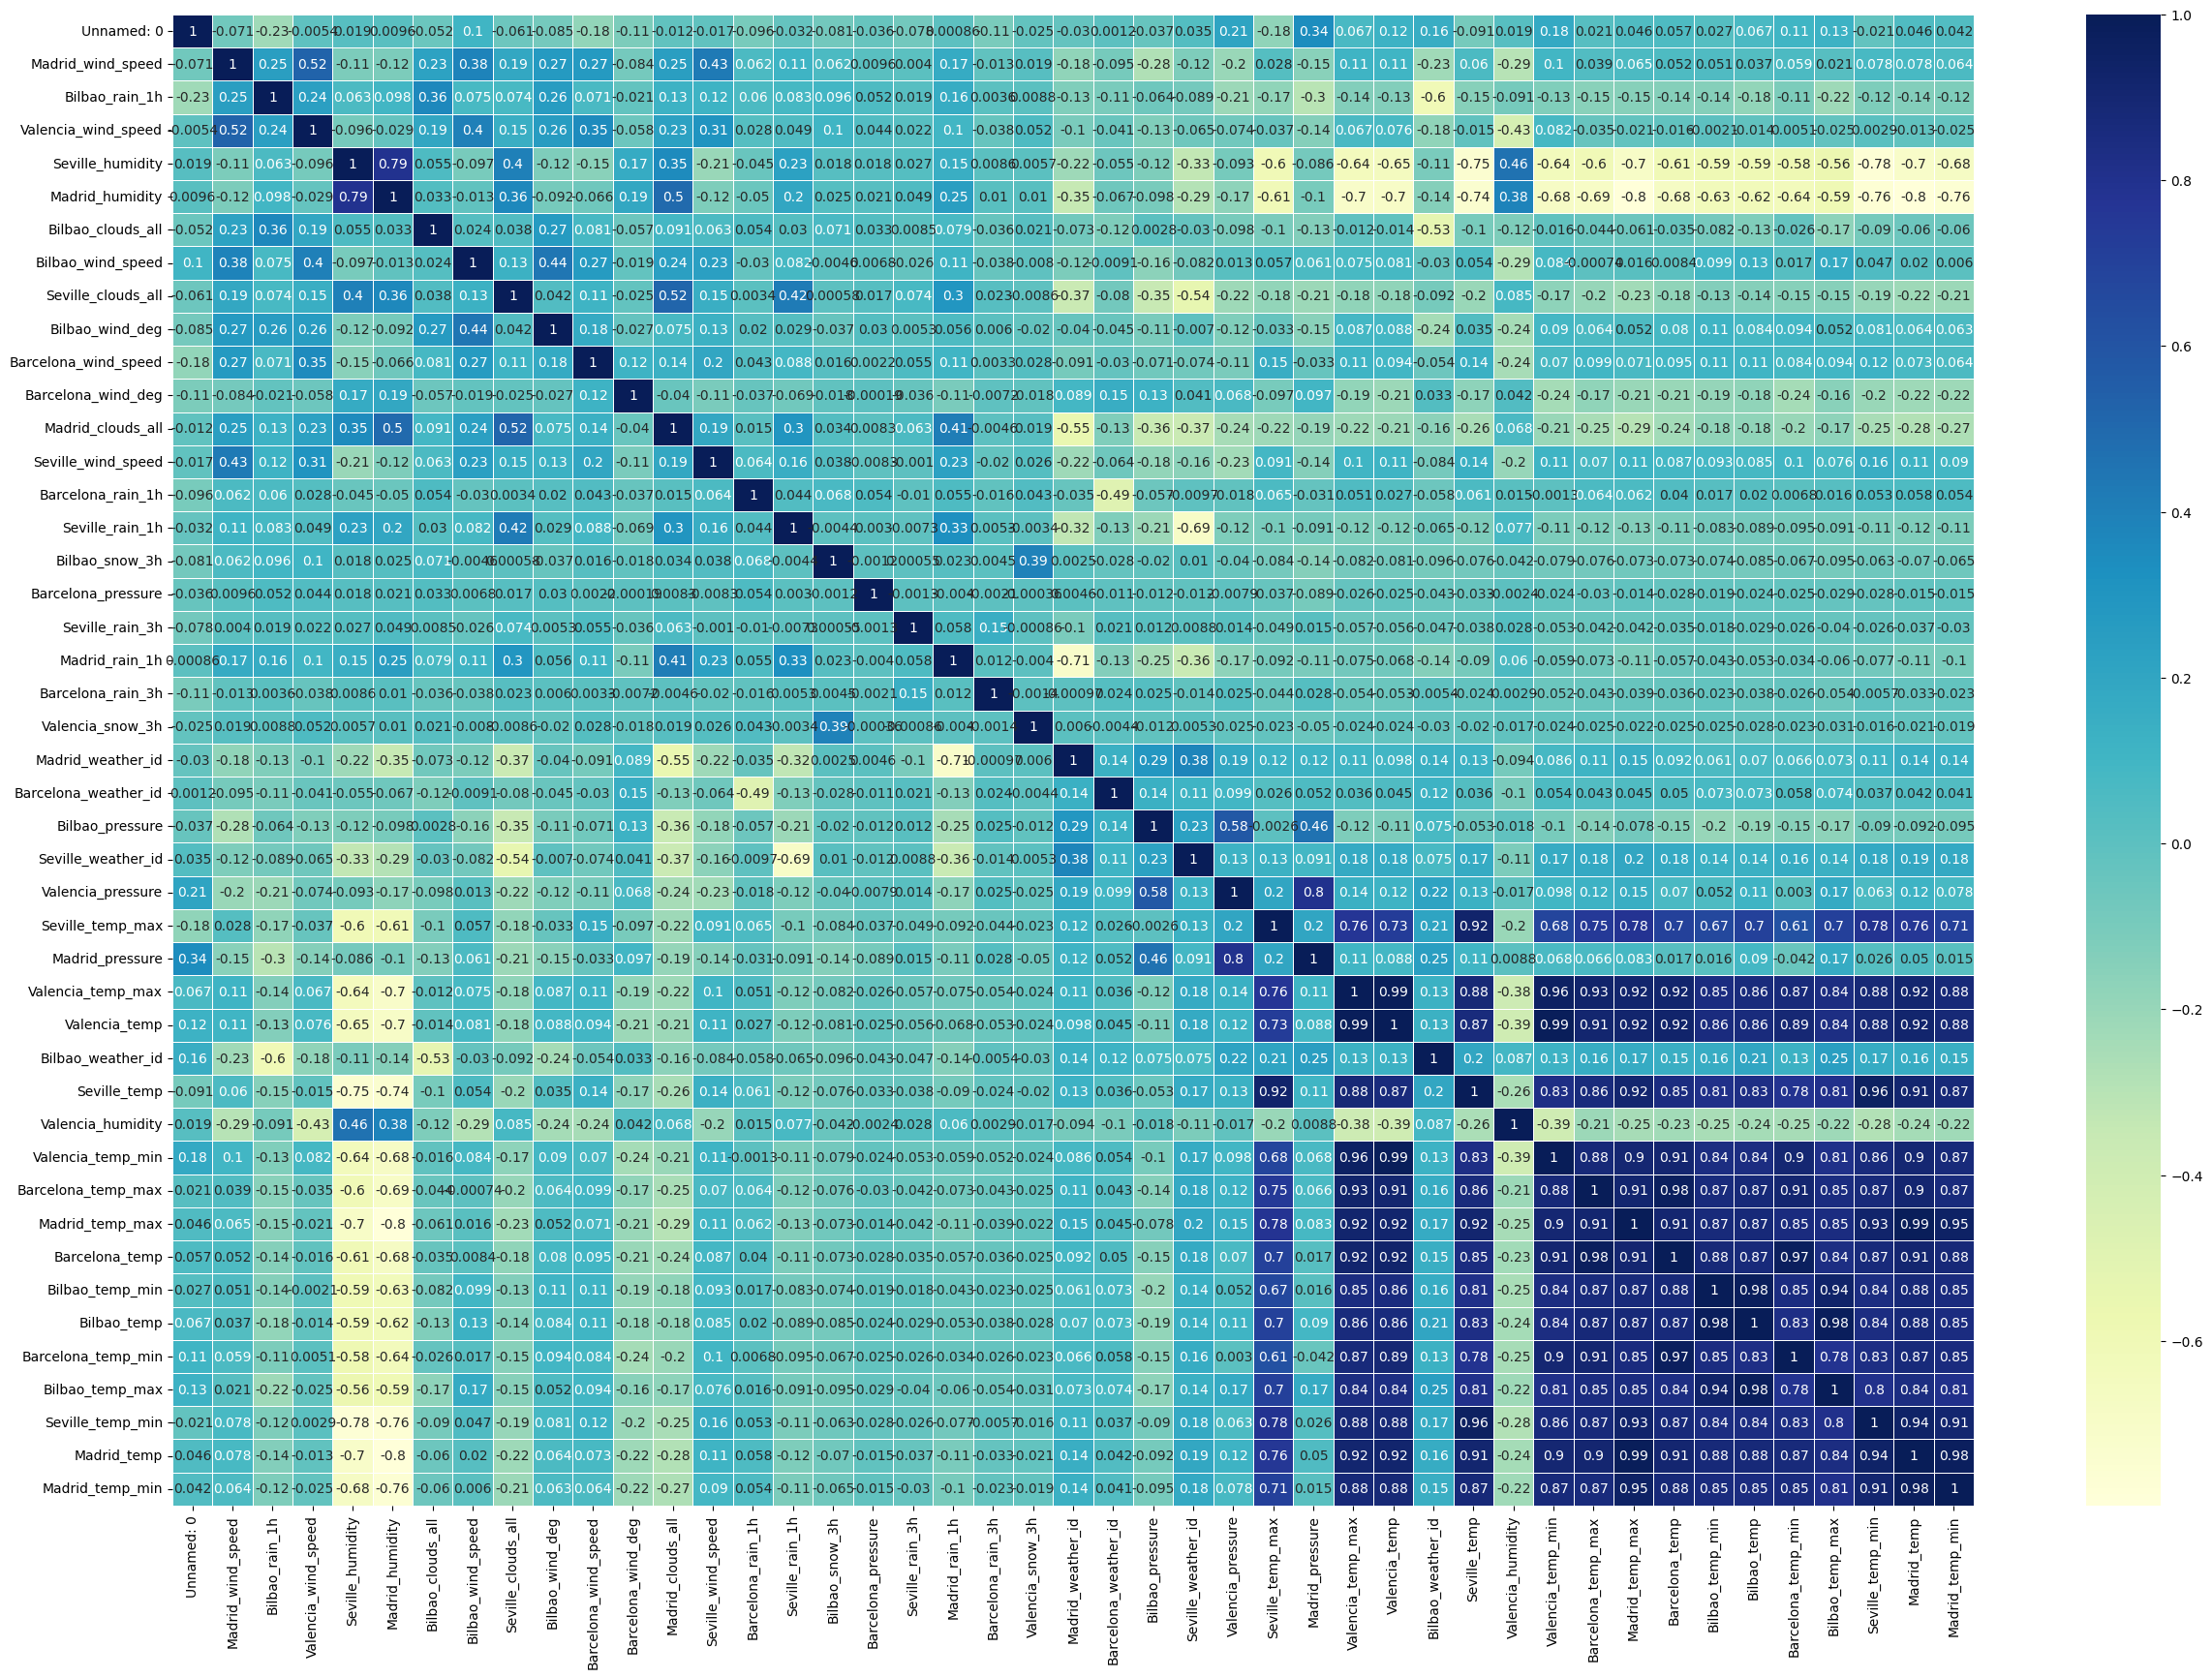

In [8]:
# evaluate correlation
def correlation_plot(data):
    """draw the correlation plot between variables."""
    
    corrmat = data.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(30,20)
    sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
        
correlation_plot(kaiju)

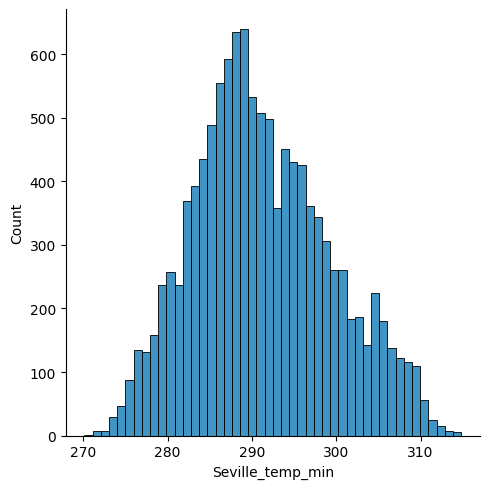

In [9]:
# have a look at feature distributions
sns.displot(kaiju['Seville_temp_min'])

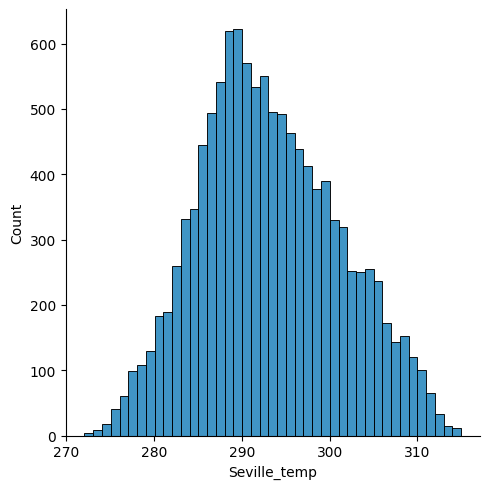

In [10]:
sns.displot(kaiju['Seville_temp'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [11]:
""" Barcelona_pressure has highly differing magnitudes , will have to normalize or standadize the values in the dataset """ 
kaiju['Barcelona_pressure'].min() , kaiju['Barcelona_pressure'].max()

(670.6666666667, 1001411.0)

In [12]:
# remove missing values/ features
#df.isna().sum() """ Gets the number of missing values per column""" 
"""Dropping column [Unnamed: 0], reason : seems to be an error (2 identify potential errors in the data and clean the existing data set;) """
kaiju.drop('Unnamed: 0',1,inplace=True)

def fill_na(data , impute_method='mean'):
    """ fill missing values with either mode or mean, user need to specify how(mode or mean) """
    dataset = data.copy()
    if impute_method=='mean':
        dataset['Valencia_pressure'] = dataset['Valencia_pressure'].fillna(dataset['Valencia_pressure'].mean())
    elif impute_method=='mode':
        dataset['Valencia_pressure'] = dataset['Valencia_pressure'].fillna(dataset['Valencia_pressure'].mode()[0])
        
    return dataset

C:\Users\User\AppData\Local\Temp\ipykernel_17944\3818325355.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  kaiju.drop('Unnamed: 0',1,inplace=True)


In [13]:
kaiju = fill_na(kaiju , impute_method='mode')

In [14]:
# create new features

def extract_time(data , drop=False):
    """"Extracting more infromation from the time column. Dropping the feature used to create the features[optional] """
    dataset = data.copy()
    dataset['Year'] = pd.to_datetime(dataset['time']).dt.year
    dataset['Month'] = pd.to_datetime(dataset['time']).dt.month
    dataset['Day'] = pd.to_datetime(dataset['time']).dt.day
    dataset['Hour'] = pd.to_datetime(dataset['time']).dt.hour
    
    if drop:
        dataset.drop('time',1,inplace=True)
    
    return dataset
    

In [15]:
kaiju = extract_time(kaiju , drop=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17944\2270656734.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop('time',1,inplace=True)


In [16]:
kaiju.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,Hour
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


In [17]:
# engineer existing features

le = LabelEncoder()
kaiju['Valencia_wind_deg'] = le.fit_transform(kaiju['Valencia_wind_deg'])
kaiju['Seville_pressure'] = le.fit_transform(kaiju['Seville_pressure'])
kaiju.head()


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,Hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,0.333333,1,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


In [18]:
sc = StandardScaler()

kaiju = sc.fit_transform(kaiju)
kaiju

array([[-0.96473169,  0.18392733, -0.35442434, ..., -1.6025079 ,
        -1.67490103, -1.09094804],
       [-1.14671363, -1.21436321, -0.35442434, ..., -1.6025079 ,
        -1.67490103, -0.65450158],
       [-0.78274975,  1.58221787, -0.35442434, ..., -1.6025079 ,
        -1.67490103, -0.21805512],
       ...,
       [-0.78274975,  0.53349996, -0.35442434, ...,  1.58793513,
         1.73508585,  0.6548378 ],
       [-0.78274975,  0.53349996, -0.35442434, ...,  1.58793513,
         1.73508585,  1.09128426],
       [-0.60076782, -1.21436321, -0.35442434, ...,  1.58793513,
         1.73508585,  1.52773072]])

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [21]:
""" Indexing the data to be split into train and test for training  """

train = kaiju[:len(df)]
new_test = kaiju[len(df):]

## 5.1) spliting the information for evaluation
- below we create a split of dataset
- we split the dataset to be able to better evaluate later on
- there are many ways to split the information(straightified Kflod,Timeseiers split etc). We will just stick to spliting the infromation with train_test_split

In [23]:
from sklearn.model_selection import train_test_split
#importing library(train_test_train) to split the train dataset into multiple smaller datasets for evaluation
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size=0.3)

# Brief intro
- this is a short intro into why I chose this model and how I came across it
 - I will be using XGBoost which stands for Extreme Gradient Boosting
 - I found out about XGBoost from a blog post I found on the Data Science website "TowardsDataScience"
 - I read up on how it is implemented and the uses of the particular model
 

## 5.2) Creating the model

- XGBoost uses the same structure as Random Forests, with Decision trees at it's core
- with XGBoost and RandomForests the are really similar(in terms of hyperparameters) , the greatest difference comes when we train the models
- We will define the parameter, we will only define one
- Random state is the parameter we will define
- apart from that we will use default parameters for the rest of the hyperparameters
- With the cell below we define the model and start training on the dataset split

In [24]:
# create one or more ML models
# defining model
# xgb.XGBRegressor().get_params() # to get all the arguments the model takes
# xgboost = xgb.XGBRegressor(random_state=PARAMETER_CONSTANT)

In [30]:
%%time
#training the model
xgboost = xgb.XGBRegressor(random_state=PARAMETER_CONSTANT)
xgboost.fit(x_train , y_train)

CPU times: total: 5.5 s
Wall time: 4.19 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=12, ...)

## 5.3) Evaluating the model
- After the model has been trained on the train data, we begin the process of evaluating the models performance 
- we import the relevant metrics which is mean_squared_error
- with all necessary imports made we then make predictions on the test set.
- with the predictions made on the test set we can see how well the model performs

In [32]:
# evaluate one or more ML models
from sklearn.metrics import mean_squared_error

print('Xgboost score {}'.format(np.sqrt(mean_squared_error(xgboost.predict(x_test) , y_test))))

Xgboost score 3070.1989768862954
LightGBM score 3085.525681721512


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Train the model on the entire dataset
xgboost.fit(train , target)

In [36]:
ss['load_shortfall_3h'] = xgboost.predict(new_test)
ss

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13138.607117
1,2018-01-01 03:00:00,7427.971731
2,2018-01-01 06:00:00,6633.200996
3,2018-01-01 09:00:00,8779.303050
4,2018-01-01 12:00:00,11406.634536
...,...,...
2915,2018-12-31 09:00:00,9332.212080
2916,2018-12-31 12:00:00,12031.749971
2917,2018-12-31 15:00:00,9189.404086
2918,2018-12-31 18:00:00,9535.809175


In [37]:
ss.to_csv('preds.csv',index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

 Out of the two models all trained and evaluated I chose the best , which was XGBoost.
 XGBoost works with decision trees, what decision trees are are multpile models that make predictions on the data 